In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Understand data

1. Relevant Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

2. Attribute information:

Input variables:
**bank client data:**

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
   .                                 "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

**other attributes:**

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [7]:
df = pd.read_csv('../data/raw/bank-dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


Osservazioni:
* Ci sono 15 variabili indipendenti e 1 variabile target
* Ci sono tre tipi di variabili: int, float e object
* pdays è il numero di giorno passati dopo che il cliente è stato contattato dall'ultima campagna. è valorizzato come -1 se non è stato contattato
* c'è un valore anomalo in età - 150 - ci sono 157 persone con quell'età -- sembra inverosimile
    * ci sono vari lavori - mi aspetterei di vedere sono in pensione o unknown --> filtro per job=='retired'
* previous ha valori tra 0 e 6, la maggior parte dei valori è pari a 0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43074 non-null  float64
 1   job        43097 non-null  object 
 2   marital    43097 non-null  object 
 3   education  43097 non-null  object 
 4   default    43097 non-null  object 
 5   balance    43097 non-null  int64  
 6   housing    43097 non-null  object 
 7   loan       43097 non-null  object 
 8   contact    43039 non-null  object 
 9   day        43097 non-null  int64  
 10  month      43097 non-null  object 
 11  duration   43021 non-null  float64
 12  campaign   43097 non-null  int64  
 13  pdays      43097 non-null  int64  
 14  previous   43097 non-null  int64  
 15  poutcome   43087 non-null  object 
 16  y          43097 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.6+ MB


In [10]:
df.drop(['day'],axis=1).describe([x*0.1 for x in range(10)])

,age,balance,duration,campaign,pdays,previous
count,43074.000000,43097.000000,43021.000000,43097.000000,43097.000000,43097.000000
mean,41.297674,1342.323596,244.533251,2.796622,38.725155,0.550154
std,12.240857,2990.087062,239.982705,3.144191,98.700477,2.280486
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
0%,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
10%,29.000000,0.000000,57.000000,1.000000,-1.000000,0.000000
20%,32.000000,19.000000,87.000000,1.000000,-1.000000,0.000000
30%,34.000000,124.800000,114.000000,1.000000,-1.000000,0.000000
40%,36.000000,264.000000,142.000000,2.000000,-1.000000,0.000000
50%,39.000000,437.000000,174.000000,2.000000,-1.000000,0.000000


In [26]:
df[df.age>56].describe([x*0.1 for x in range(10)])

,age,balance,day,duration,campaign,pdays,previous
count,3885.000000,3885.000000,3885.000000,3880.000000,3885.000000,3885.000000,3885.000000
mean,64.637323,2088.631660,15.366538,261.554124,2.614929,35.751351,0.592793
std,18.444869,4400.220759,8.637273,273.213959,2.656043,88.883743,1.694162
min,57.000000,-4057.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
0%,57.000000,-4057.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
10%,57.000000,0.000000,5.000000,65.000000,1.000000,-1.000000,0.000000
20%,57.000000,63.000000,7.000000,94.000000,1.000000,-1.000000,0.000000
30%,58.000000,222.000000,9.000000,120.000000,1.000000,-1.000000,0.000000
40%,59.000000,444.600000,13.000000,147.000000,1.000000,-1.000000,0.000000
50%,59.000000,753.000000,15.000000,181.000000,2.000000,-1.000000,0.000000


In [31]:
df[df.age>=100].describe([x*0.1 for x in range(10)])

,age,balance,day,duration,campaign,pdays,previous
count,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,150.0,1386.318471,14.936306,246.757962,2.121019,42.121019,0.757962
std,0.0,2280.835289,8.590157,205.886433,1.882273,93.136814,2.089047
min,150.0,-295.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
0%,150.0,-295.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
10%,150.0,1.600000,4.000000,71.200000,1.000000,-1.000000,0.000000
20%,150.0,104.600000,6.000000,116.200000,1.000000,-1.000000,0.000000
30%,150.0,220.800000,8.800000,132.800000,1.000000,-1.000000,0.000000
40%,150.0,348.800000,12.000000,155.400000,1.000000,-1.000000,0.000000
50%,150.0,489.000000,15.000000,182.000000,1.000000,-1.000000,0.000000


In [35]:
df[df.age>=100].job.value_counts()

job
student          58
retired          34
services         18
blue-collar      15
admin.           12
technician        8
management        7
housemaid         2
unknown           1
unemployed        1
self-employed     1
Name: count, dtype: int64

In [36]:
df.previous.value_counts()

previous
0      35604
1       2541
2       1915
3       1032
4        645
5        422
6        242
7        181
8        104
9         82
11        58
10        55
12        41
13        36
15        20
14        17
17        14
16        13
19        11
20         7
23         7
22         6
18         6
24         5
27         5
25         4
21         3
30         3
29         3
38         2
37         2
26         2
28         2
51         1
275        1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

Ci sono missing nelle seguenti variabili:
* 0.05% in age
* 0.13% in contact
* 0.023% in poutcome

In [37]:
df.isnull().sum()/len(df)*100

age          0.053368
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.134580
day          0.000000
month        0.000000
duration     0.176346
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.023203
y            0.000000
dtype: float64

Osservazioni sulla variabile target:
* Più del 90% delle persone non hanno sottoscritto il deposito bancario
* Il dataset è sbilanciato

In [39]:
df['y'].value_counts()

y
no     39925
yes     3172
Name: count, dtype: int64

In [38]:
df['y'].value_counts(normalize=True)

y
no     0.926399
yes    0.073601
Name: proportion, dtype: float64

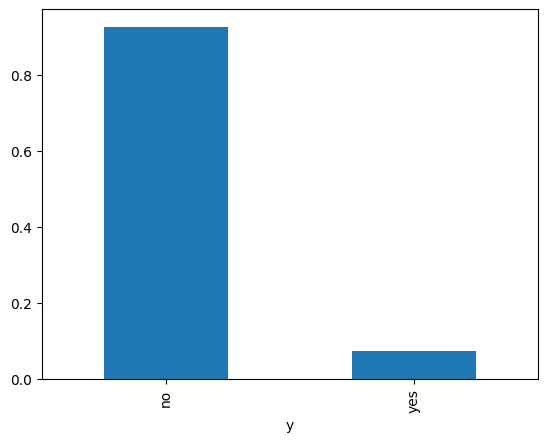

In [40]:
df['y'].value_counts(normalize=True).plot.bar()
plt.show()

In [50]:
for c in categ_features:
    print('Unique values of {}: \n'.format(c))
    print(df[c].value_counts(normalize=True))

Unique values of job: 

job
blue-collar      0.219226
management       0.207416
technician       0.168248
admin.           0.114324
services         0.092744
retired          0.047915
self-employed    0.035084
entrepreneur     0.033181
unemployed       0.028099
housemaid        0.027682
student          0.019607
unknown          0.006474
Name: proportion, dtype: float64
Unique values of marital: 

marital
married     0.605657
single      0.275820
divorced    0.114625
Singl       0.002320
S           0.000905
divrcd      0.000650
Single      0.000023
Name: proportion, dtype: float64
Unique values of education: 

education
secondary    0.516092
tertiary     0.289927
primary      0.153259
unknown      0.040722
Name: proportion, dtype: float64
Unique values of default: 

default
no     0.98146
yes    0.01854
Name: proportion, dtype: float64
Unique values of housing: 

housing
yes    0.56468
no     0.43532
Name: proportion, dtype: float64
Unique values of loan: 

loan
no     0.83623
yes    

## 2- Exploratory Data Analysis

In [44]:
numeric_features = df.columns[(df.dtypes=='int')|(df.dtypes=='float')].drop(['day']).to_list()
numeric_features

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [45]:
categ_features = df.columns[df.dtypes=='object'].drop(['y']).to_list() + ['day']
categ_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'day']

### Histograms

le variabili hanno in generale una distribuzione assimetrica a destra e valori anomali molto alti

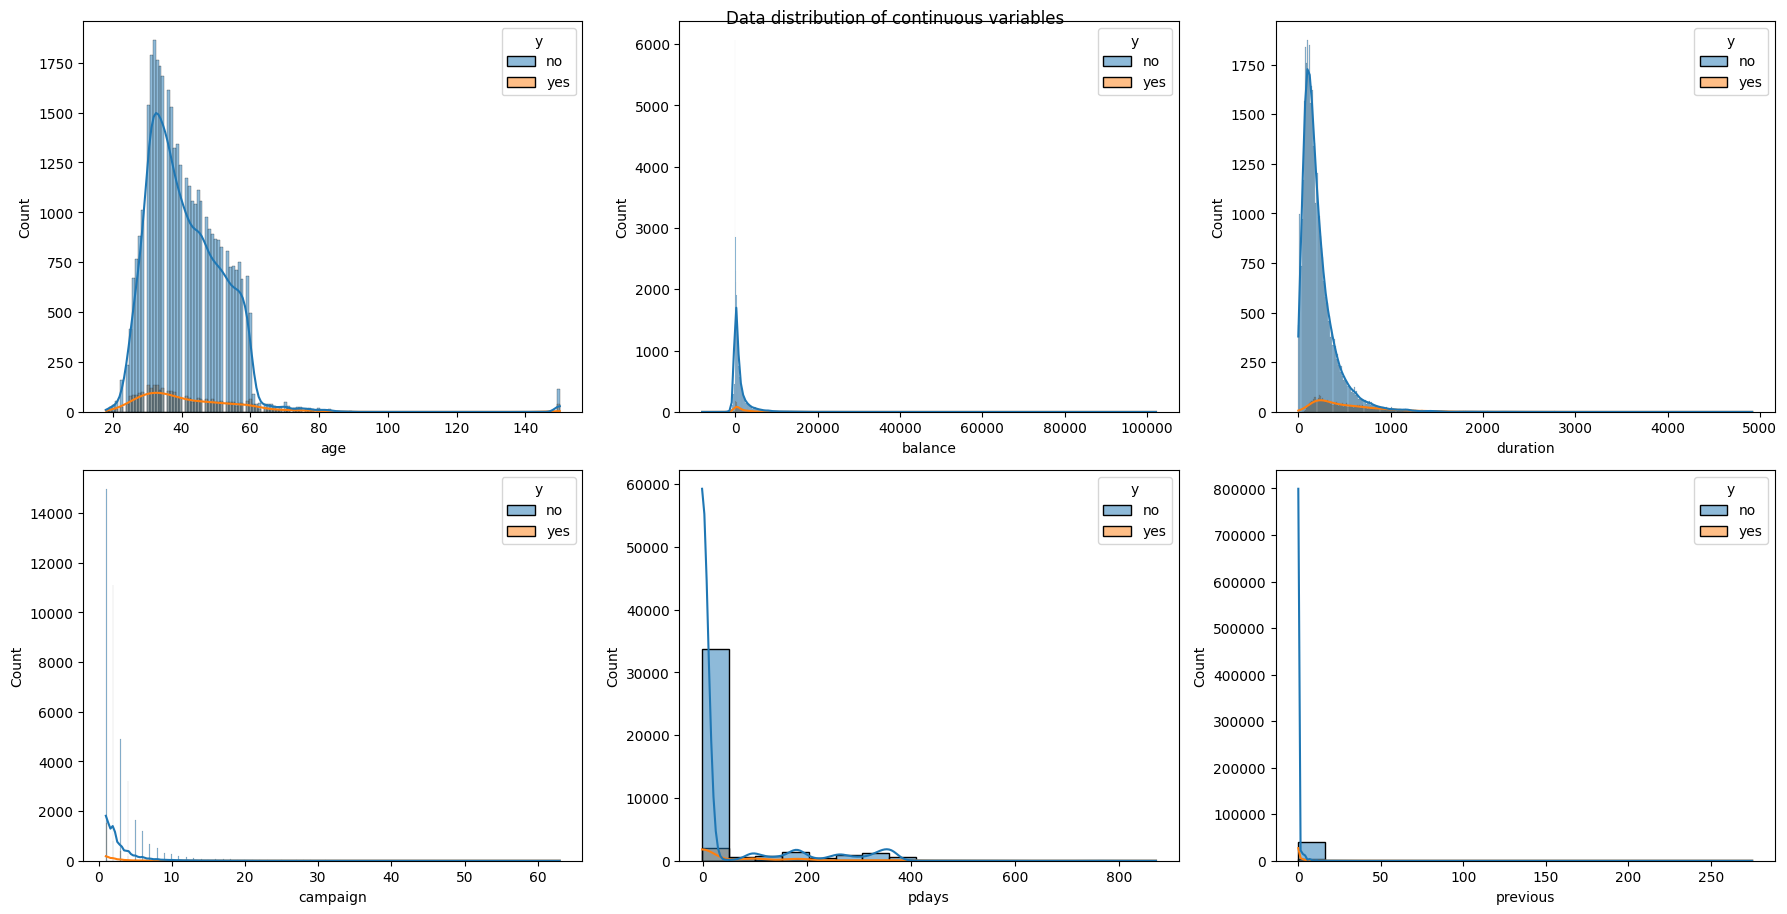

In [46]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='blue',kde=True,hue='y')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### boxplots

* C'è differenza di distribuzione tra le due classi della variabile target guardando la variabile duration e pdays
* previous ha poca variabilità, dato che minimo, primo quartile, mediana, terzo quartile e massimo coincidono

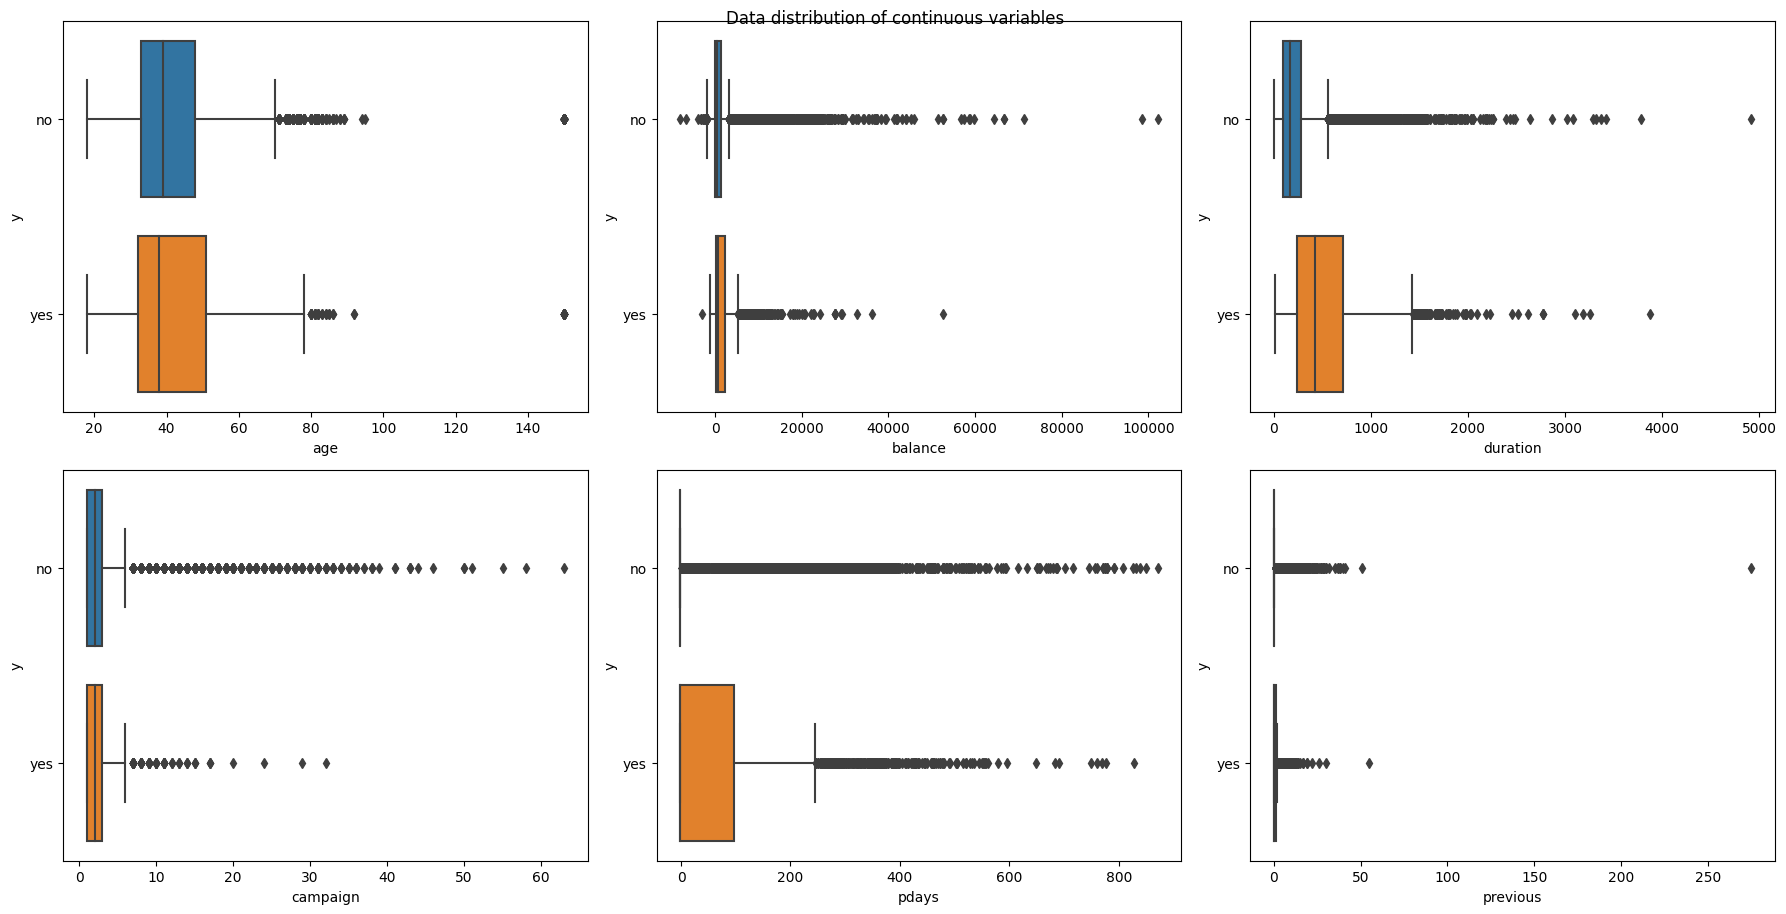

In [47]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col,y='y', ax=ax)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### barplot delle variabili categoriche

* la maggior parte delle persone fanno come lavoro l'operaio
* la maggior parte delle persone sono sposate
    * marital ha dei livelli sbagliati --> da correggere dopo
* l'educazione secondaria è la più comune
* la maggior parte delle compagne marketing telefoniche sono state fatte a maggio
* la maggior parte delle compagne marketing telefoniche sono state fatte al cellulare

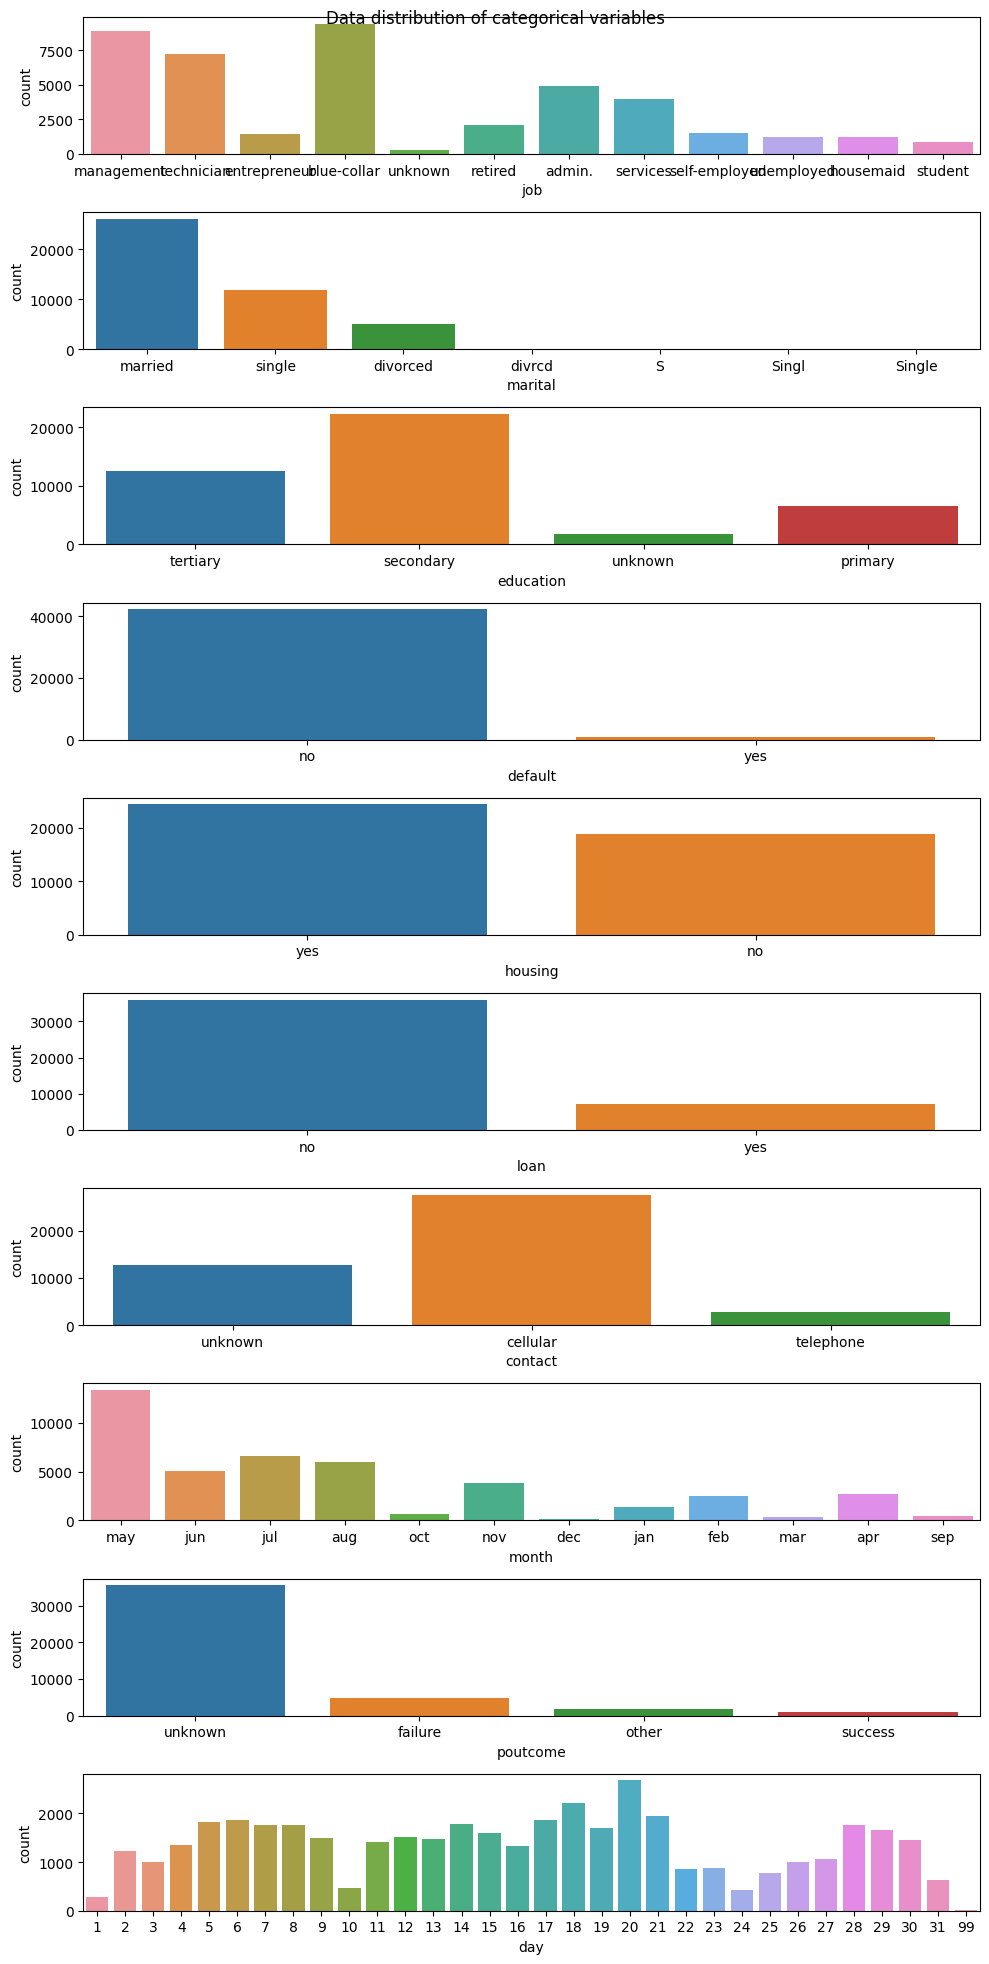

In [48]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(categ_features):
    ax = plt.subplot(10,1, i+1)
    sns.countplot(data=df, x=col, ax=ax)
plt.suptitle('Data distribution of categorical variables')
plt.tight_layout()

### Correlation

* C'è in generale una correlazione neutra tra le coppie di variabili
* si nota una correlazione leggermente positiva tra età e bilancio
* c'è una correlazione positiva tra previous e pdays

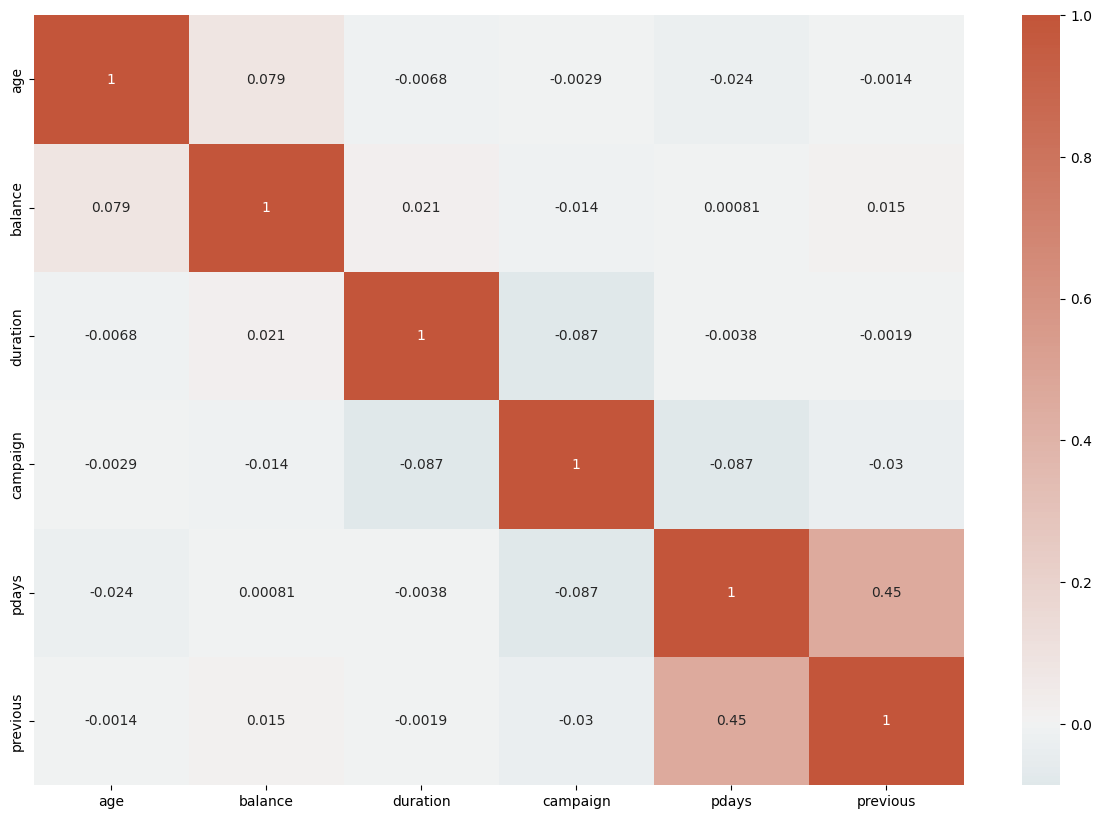

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_features].corr(),annot=True,center = 0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Deduzioni dall'analisi:
* Eliminare persone che hanno 150 anni e hanno un lavoro diverso da 'retired' o 'unknown'
* creare una variabile categorica pdays pari a 1 se il cliente è stato contattato in precedenza, 0 altrimenti (se pdays=-1)
* creare una variabile categorica basata sui valori numerici di previous
* correggere marital
* codificare month
* gestire i missing
* gestire le distribuzioni asimmetriche con molti outlier
* eliminare postoutcome perchè più dell'80% è non conosciuta